cross_contamination --merged_file /home/gpratt/scratch/foo.bam --paired --extract-umi-method front --out_file ~/A04_counts.txt --umi-separator :

In [27]:
from gscripts import qtools

In [34]:
jobs = """cross_contamination --in_files /projects/ps-yeolab3/encode/analysis/encode_master/*A01*sorted.bam --paired --extract-umi-method front --out_file ~/A01_counts.txt --umi-separator : --temp_dir /home/gpratt/scratch/ad-hoc/
cross_contamination --in_files /projects/ps-yeolab3/encode/analysis/encode_master/*B06*sorted.bam --paired --extract-umi-method front --out_file ~/B06_counts.txt --umi-separator : --temp_dir /home/gpratt/scratch/ad-hoc/
cross_contamination --in_files /projects/ps-yeolab3/encode/analysis/encode_master/*C01*sorted.bam --paired --extract-umi-method front --out_file ~/C01_counts.txt --umi-separator : --temp_dir /home/gpratt/scratch/ad-hoc/
cross_contamination --in_files /projects/ps-yeolab3/encode/analysis/encode_master/*D08fixed*sorted.bam --paired --extract-umi-method front --out_file ~/D08fixed_counts.txt --umi-separator : --temp_dir /home/gpratt/scratch/ad-hoc/
cross_contamination --in_files /projects/ps-yeolab3/encode/analysis/encode_master/*A03*sorted.bam --paired --extract-umi-method front --out_file ~/A03_counts.txt --umi-separator : --temp_dir /home/gpratt/scratch/ad-hoc/
cross_contamination --in_files /projects/ps-yeolab3/encode/analysis/encode_master/*G07*sorted.bam --paired --extract-umi-method front --out_file ~/G07_counts.txt --umi-separator : --temp_dir /home/gpratt/scratch/ad-hoc/
cross_contamination --in_files /projects/ps-yeolab3/encode/analysis/encode_master/*A04*sorted.bam --paired --extract-umi-method front --out_file ~/A04_counts.txt --umi-separator : --temp_dir /home/gpratt/scratch/ad-hoc/
cross_contamination --in_files /projects/ps-yeolab3/encode/analysis/encode_master/*F05*sorted.bam --paired --extract-umi-method front --out_file ~/F05_counts.txt --umi-separator : --temp_dir /home/gpratt/scratch/ad-hoc/
cross_contamination --in_files /projects/ps-yeolab3/encode/analysis/encode_master/*X1A*sorted.bam --paired --extract-umi-method front --out_file ~/X1A_counts.txt --umi-separator : --temp_dir /home/gpratt/scratch/ad-hoc/
cross_contamination --in_files /projects/ps-yeolab3/encode/analysis/encode_master/*X1B*sorted.bam --paired --extract-umi-method front --out_file ~/X1B_counts.txt --umi-separator : --temp_dir /home/gpratt/scratch/ad-hoc/
cross_contamination --in_files /projects/ps-yeolab3/encode/analysis/encode_master/*X2A*sorted.bam --paired --extract-umi-method front --out_file ~/X2A_counts.txt --umi-separator : --temp_dir /home/gpratt/scratch/ad-hoc/
cross_contamination --in_files /projects/ps-yeolab3/encode/analysis/encode_master/*X2B*sorted.bam --paired --extract-umi-method front --out_file ~/X2B_counts.txt --umi-separator : --temp_dir /home/gpratt/scratch/ad-hoc/""".split("\n")

In [35]:
job_name = "cross_contamination"
job = qtools.Submitter(commands=jobs, 
                 job_name="{}".format(job_name), 
                 sh_filename="/home/gpratt/projects/idr/scripts/{}.sh".format(job_name),
                array=True,
                walltime="48:00:00",
                out_filename="/home/gpratt/projects/idr/scripts/{}.out".format(job_name),
                err_filename="/home/gpratt/projects/idr/scripts/{}.err".format(job_name),
                queue="home-yeo")
job.job()

print "/home/gpratt/projects/idr/scripts/{}.sh".format(job_name)

/home/gpratt/projects/idr/scripts/cross_contamination.sh


running 12 tasks as an array-job.


In [8]:
%matplotlib inline 
import pandas as pd
import seaborn as sns
from crosser import cross_contamination`
reload(cross_contamination)

In [9]:
files = pd.read_csv("/home/gpratt/A04_counts.txt", index_col=0)
sns.clustermap(files)

In [19]:
files[((files > .001) & (files < 1.0)).apply(any)]

10_GM12878_CLIP_1_Infminus_AND_12_GM12878_CLIP_1_Infplus_ATTCAGAA-ATAGAGGC_R1.A04_12_GM12878_CLIP_1_Infplus_R60.adapterTrim.round2.rmRep.rmDup.sorted  \
293XT_CLIP_RBFOX2_1120_GAATTCGT-TAATCTTA_R1.A04...                                           0.000005                                                                                                       
293XT_RBFOX2_1120_CLIP_S2_L006_R1_001_4000.A04_...                                           0.000003                                                                                                       

                                                    234_CLIP_GAATTCGT-TATAGCCT_L003_R1.A04_237_02_FXR2.adapterTrim.round2.rmRep.rmDup.sorted  \
293XT_CLIP_RBFOX2_1120_GAATTCGT-TAATCTTA_R1.A04...                                           0.000004                                          
293XT_RBFOX2_1120_CLIP_S2_L006_R1_001_4000.A04_...                                           0.000002                                          

                                                    235_CLIP_ATTCAGAA-CCTATCCT_L002_R1.A04_235_01_XRN2.adapterTrim.round2.rmRep.rmDup.sorted  \
293XT_CLIP_RBFOX2_1120_GAATTCGT-TAATCTTA_R1.A04...                                           0.000006                                          
293XT_RBFOX2_1120_CLIP_S2_L006_R1_001_4000.A04_...                                           0.000003                                          

                                                    235_CLIP_S53_L006_R1_001.A04_235_01_4000_XRN2.adapterTrim.round2.rmRep.rmDup.sorted  \
293XT_CLIP_RBFOX2_1120_GAATTCGT-TAATCTTA_R1.A04...                                                0.0                                     
293XT_RBFOX2_1120_CLIP_S2_L006_R1_001_4000.A04_...                                                0.0                                     

                                                    236_CLIP_ATTACTCG-TATAGCCT_L001_R1.A04_236_02_FMR1.adapterTrim.round2.rmRep.rmDup.sorted  \
293XT_CLIP_RBFOX2_1120_GAATTCGT-TAATCTTA_R1.A04...                                           0.000002                                          
293XT_RBFOX2_1120_CLIP_S2_L006_R1_001_4000.A04_...                                           0.000001                                          

                                                    246_CLIP_GAATTCGT-GGCTCTGA_L003_R1.A04_246_02_AUH.adapterTrim.round2.rmRep.rmDup.sorted  \
293XT_CLIP_RBFOX2_1120_GAATTCGT-TAATCTTA_R1.A04...                                           0.000004                                         
293XT_RBFOX2_1120_CLIP_S2_L006_R1_001_4000.A04_...                                           0.000002                                         

                                                    254_CLIP_ATTCAGAA-TAATCTTA_L006_R1.A04_254_01_BCCIP.adapterTrim.round2.rmRep.rmDup.sorted  \
293XT_CLIP_RBFOX2_1120_GAATTCGT-TAATCTTA_R1.A04...                                           0.000003                                           
293XT_RBFOX2_1120_CLIP_S2_L006_R1_001_4000.A04_...                                           0.000002                                           

                                                    255_01_CLIP_CGCTCATT-TAATCTTA_L004_R1.A04_255_01_EIF4A3.adapterTrim.round2.rmRep.rmDup.sorted  \
293XT_CLIP_RBFOX2_1120_GAATTCGT-TAATCTTA_R1.A04...                                           0.000002                                               
293XT_RBFOX2_1120_CLIP_S2_L006_R1_001_4000.A04_...                                           0.000001                                               

                                                    271_CLIP_TCCGGAGA-GGCTCTGA_L002_R1.A04_271_01_HNRNPC.adapterTrim.round2.rmRep.rmDup.sorted  \
293XT_CLIP_RBFOX2_1120_GAATTCGT-TAATCTTA_R1.A04...                                           0.000004                                            
293XT_RBFOX2_1120_CLIP_S2_L006_R1_001_4000.A04_...                                           0.000002            

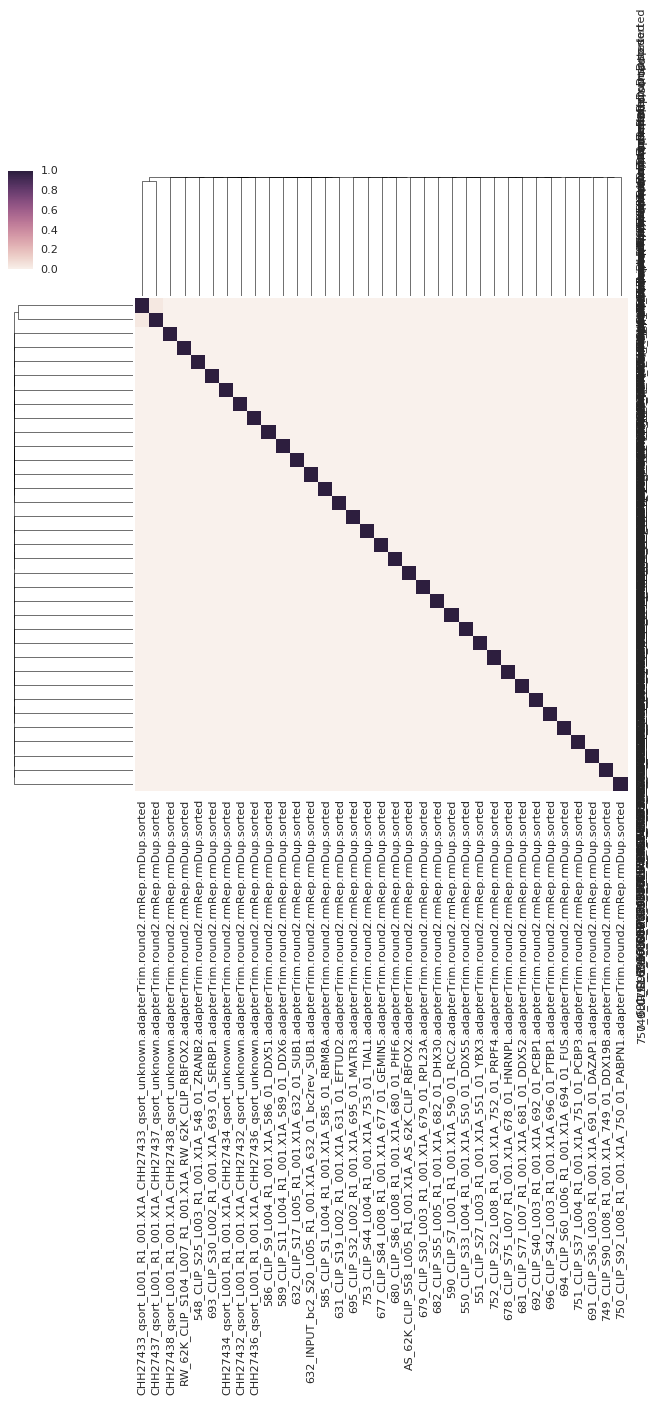

In [36]:
files = pd.read_csv("/home/gpratt/X1A_counts.txt", index_col=0)
sns.clustermap(files)

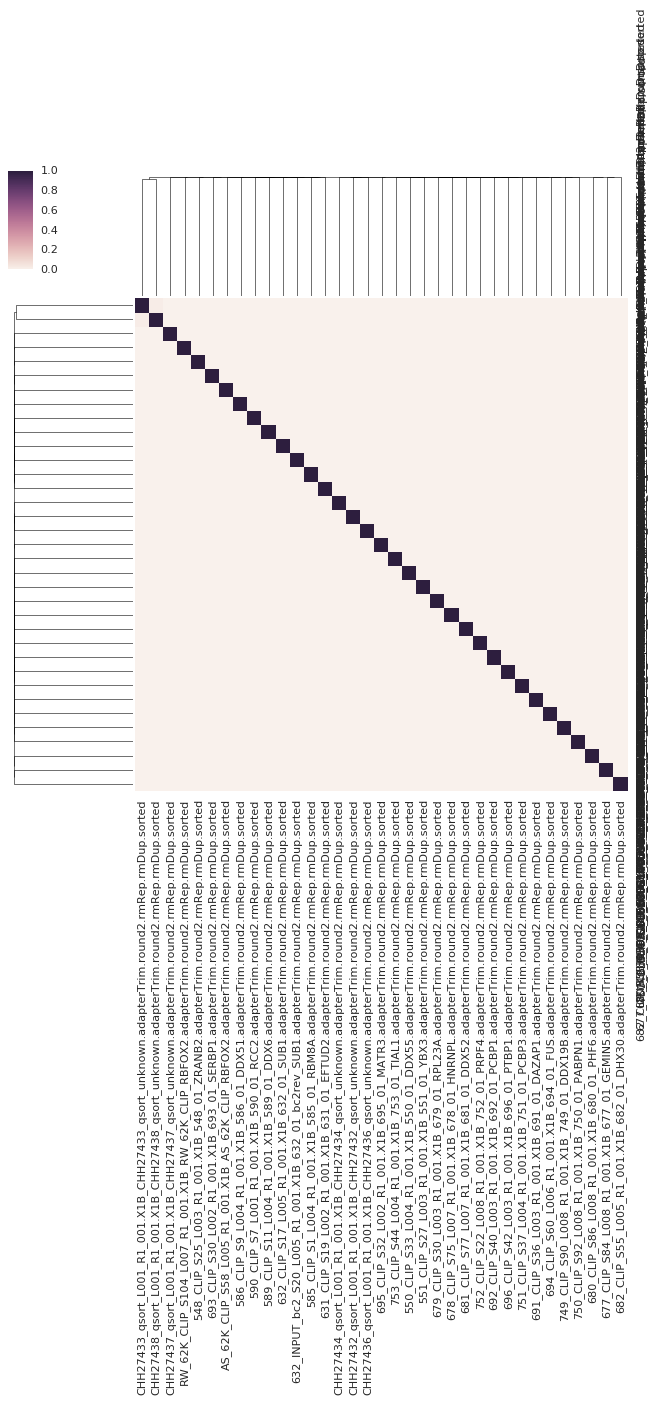

In [37]:
files = pd.read_csv("/home/gpratt/X1B_counts.txt", index_col=0)
sns.clustermap(files)

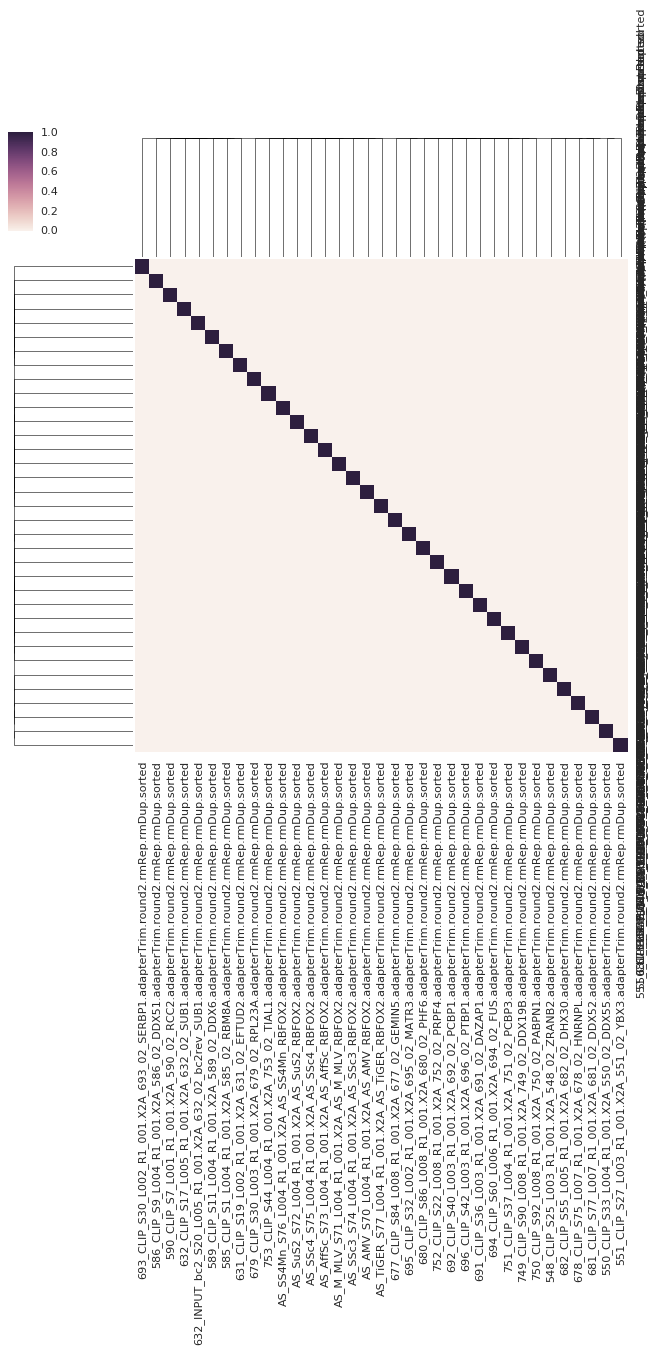

In [38]:
files = pd.read_csv("/home/gpratt/X2A_counts.txt", index_col=0)
sns.clustermap(files)

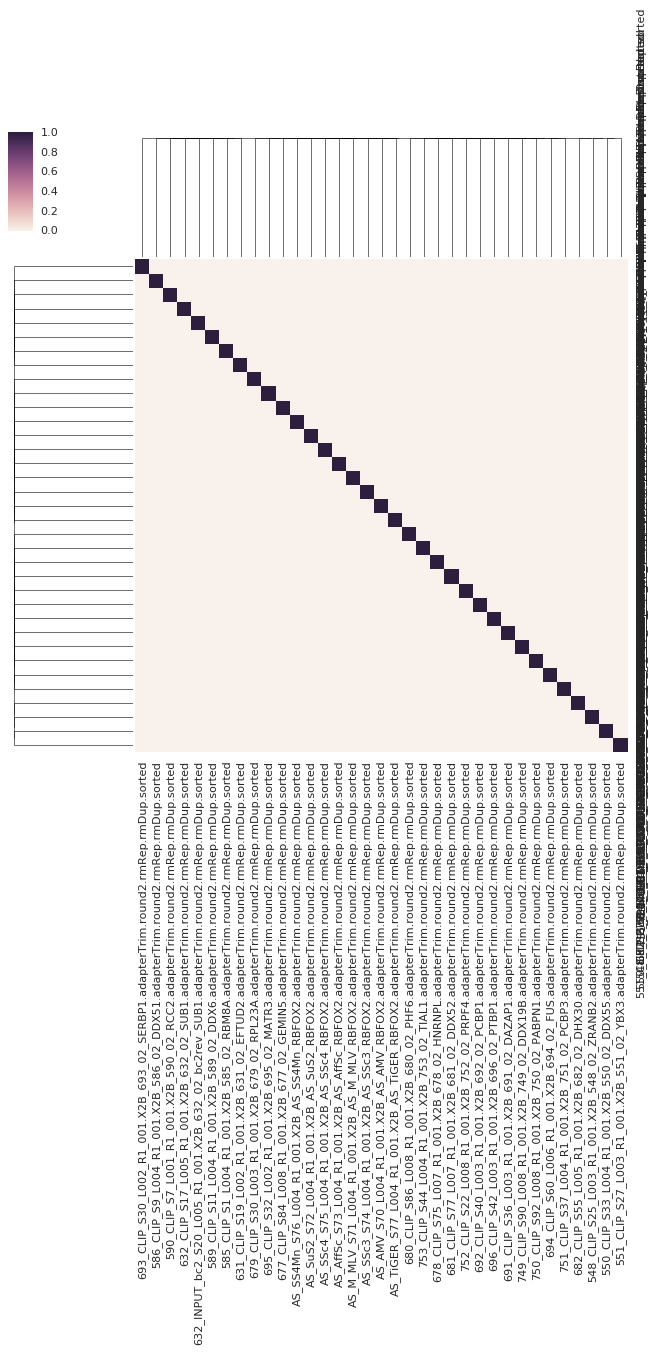

In [39]:
files = pd.read_csv("/home/gpratt/X2B_counts.txt", index_col=0)
sns.clustermap(files)

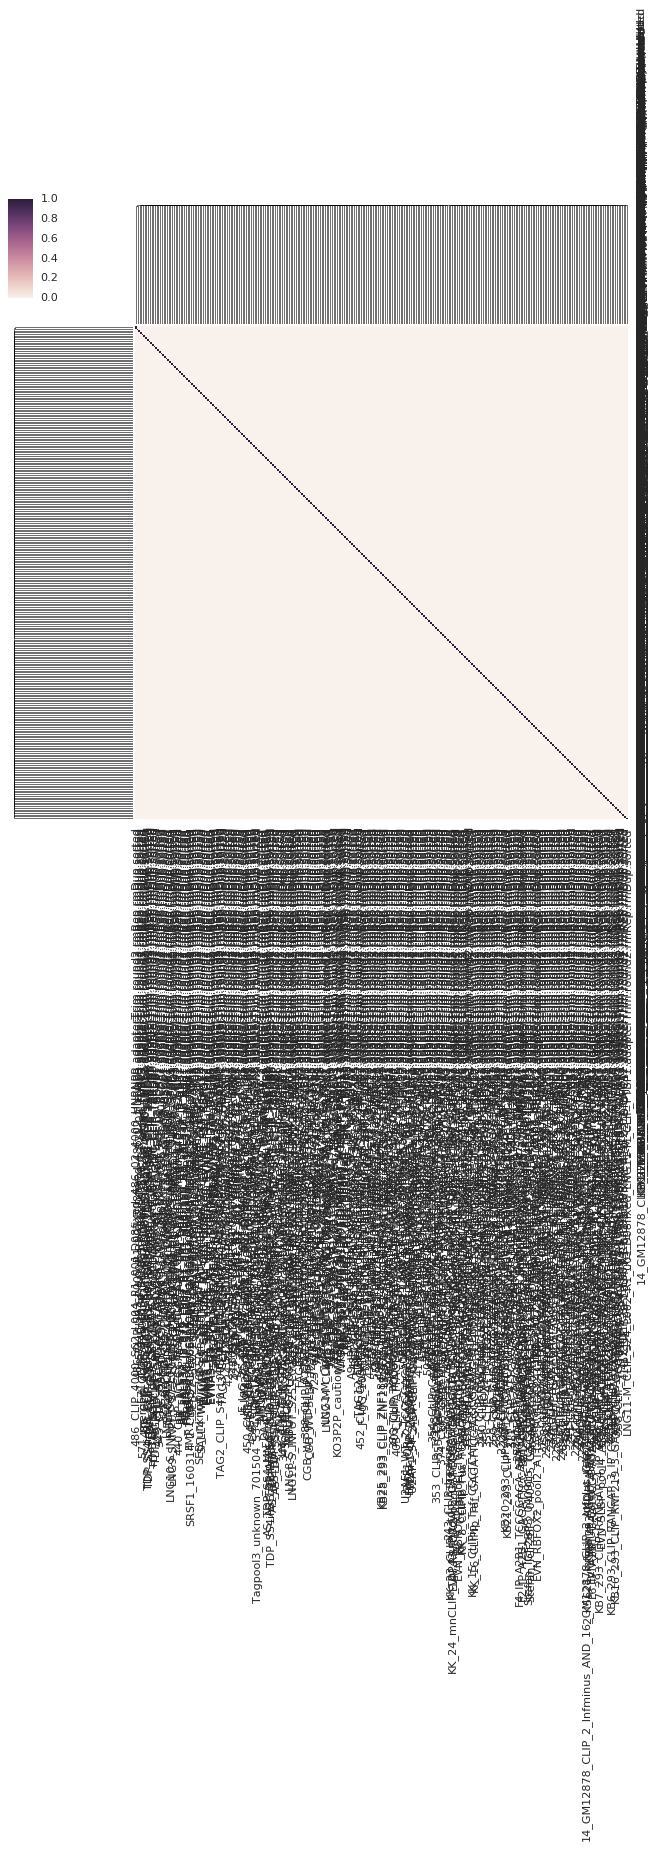

In [40]:
files = pd.read_csv("/home/gpratt/D08fixed_counts.txt", index_col=0)
sns.clustermap(files)

In [44]:
from IPython.core.display import HTML

In [47]:
foo = files[((files > .001) & (files < 1.0)).apply(any)].T

In [52]:
foo[((foo > .001) & (foo < 1.0)).apply(any, axis=1)]

485_CLIP_4000_S83_L006_R1_001.D08fixed_485_01_4000_EIF2S2.adapterTrim.round2.rmRep.rmDup.sorted  \
485_CLIP_4000_S83_L006_R1_001.D08fixed_485_01_4...                                       1.000000e+00                                                 
485_CLIP_S41_L005_R1_001.D08fixed_485_01_EIF2B....                                       1.764432e-03                                                 
486_CLIP_4000_S62_L004_R1_001.D08fixed_486_02_4...                                       1.163270e-05                                                 
486_CLIP_S43_L005_R1_001.D08fixed_486_02_HNRNPR...                                       7.454977e-06                                                 
571_CLIP_S40_L004_R1_001.D08fixed_571_02_reseq_...                                       3.080569e-08                                                 
571_CLIP_S7_L001_R1_001.D08fixed_571_02_FUBP3.a...                                       2.606635e-08                                                 
571_merged_CLIP_S7_L001_R1_001.D08fixed_571_02_...                                       5.213271e-08                                                 

                                                    485_CLIP_S41_L005_R1_001.D08fixed_485_01_EIF2B.adapterTrim.round2.rmRep.rmDup.sorted  \
485_CLIP_4000_S83_L006_R1_001.D08fixed_485_01_4...                                       1.764432e-03                                      
485_CLIP_S41_L005_R1_001.D08fixed_485_01_EIF2B....                                       1.000000e+00                                      
486_CLIP_4000_S62_L004_R1_001.D08fixed_486_02_4...                                       1.051422e-05                                      
486_CLIP_S43_L005_R1_001.D08fixed_486_02_HNRNPR...                                       6.556873e-06                                      
571_CLIP_S40_L004_R1_001.D08fixed_571_02_reseq_...                                       2.369669e-08                                      
571_CLIP_S7_L001_R1_001.D08fixed_571_02_FUBP3.a...                                       1.895735e-08                                      
571_merged_CLIP_S7_L001_R1_001.D08fixed_571_02_...                                       3.791470e-08                                      

                                                    486_CLIP_4000_S62_L004_R1_001.D08fixed_486_02_4000_HNRNPR.adapterTrim.round2.rmRep.rmDup.sorted  \
485_CLIP_4000_S83_L006_R1_001.D08fixed_485_01_4...                                       1.163270e-05                                                 
485_CLIP_S41_L005_R1_001.D08fixed_485_01_EIF2B....                                       1.051422e-05                                                 
486_CLIP_4000_S62_L004_R1_001.D08fixed_486_02_4...                                       1.000000e+00                                                 
486_CLIP_S43_L005_R1_001.D08fixed_486_02_HNRNPR...                                       1.036037e-02                                                 
571_CLIP_S40_L004_R1_001.D08fixed_571_02_reseq_...                                       9.478674e-08                                                 
571_CLIP_S7_L001_R1_001.D08fixed_571_02_FUBP3.a...                                       4.739337e-08                                                 
571_merged_CLIP_S7_L001_R1_001.D08fixed_571_02_...                                       1.398104e-07                                                 

                                                    486_CLIP_S43_L005_R1_001.D08fixed_486_02_HNRNPR.adapterTrim.round2.rmRep.rmDup.sorted  \
485_CLIP_4000_S83_L006_R1_001.D08fixed_485_01_4...                                       7.454977e-06                                       
485_CLIP_S41_L005_R1_001.D08fixed_485_01_EIF2B....                                       6.556873e-06                                       
486_CLIP_4000_S62_L004_R1_001.D08fixed_486_02_4...                                       1

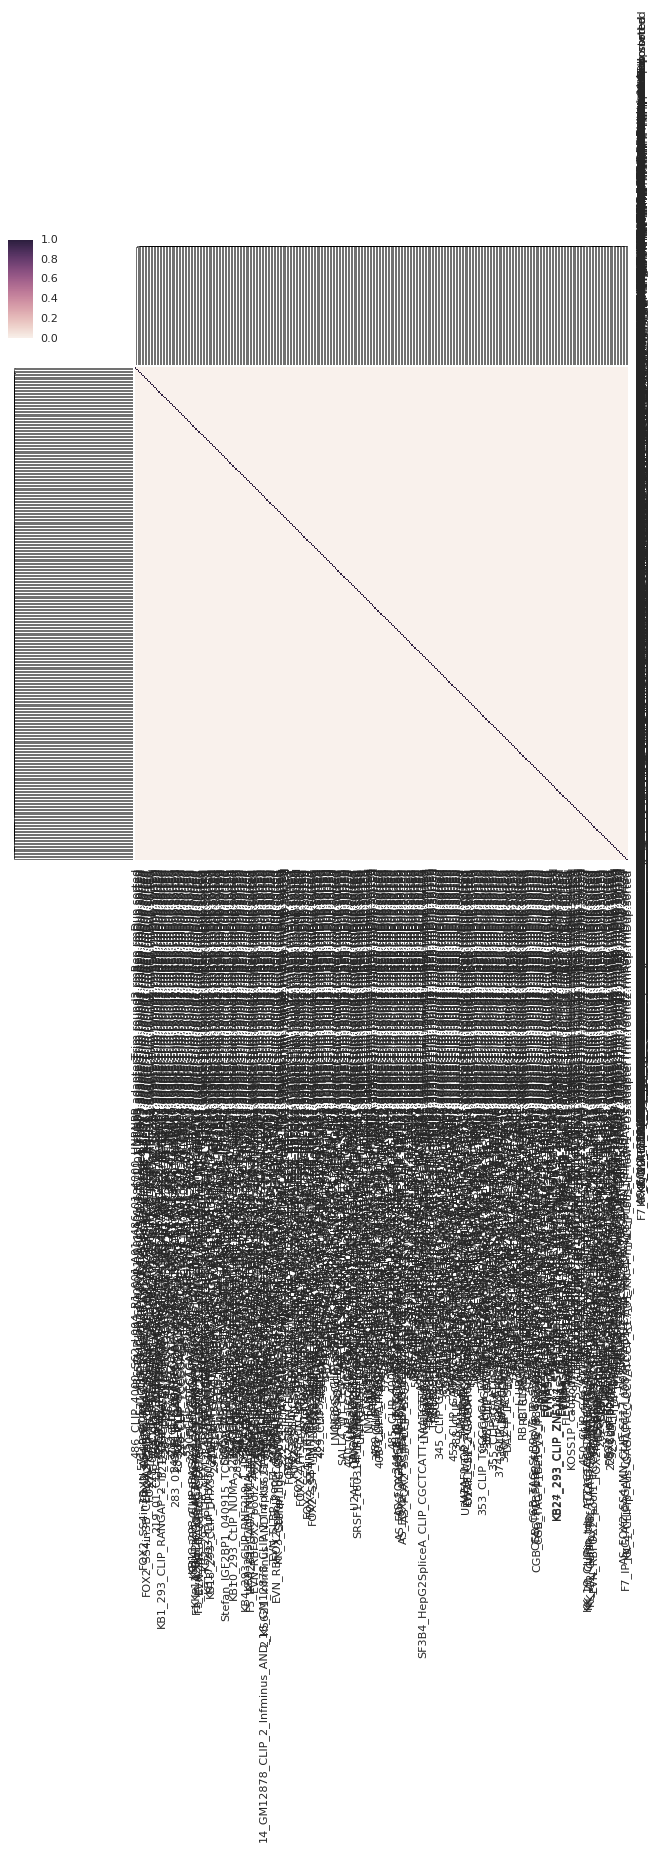

In [53]:
files = pd.read_csv("/home/gpratt/A01_counts.txt", index_col=0)
sns.clustermap(files)

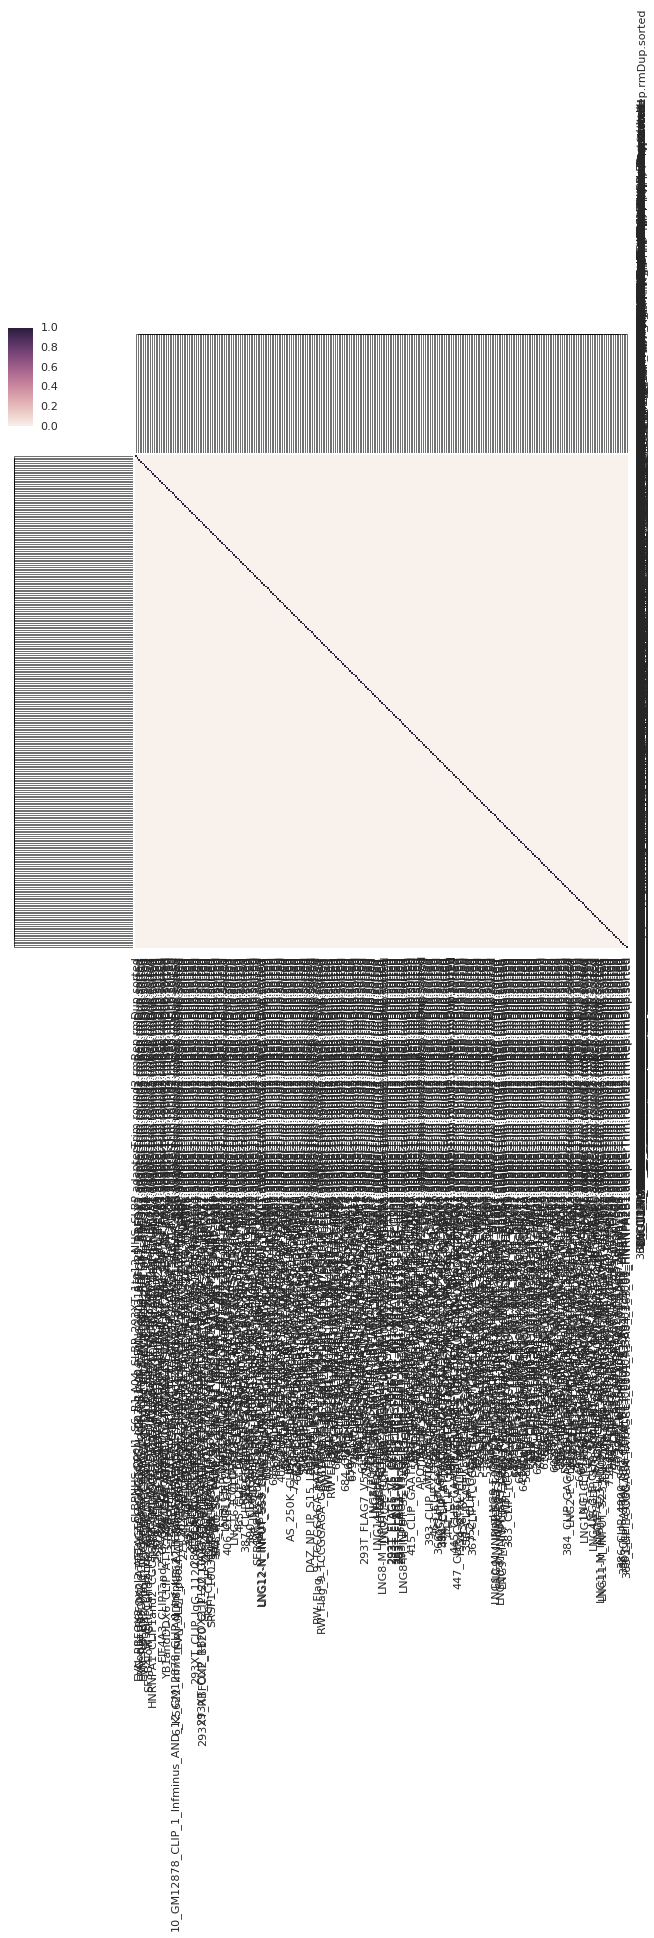

In [54]:
files = pd.read_csv("/home/gpratt/A04_counts.txt", index_col=0)
sns.clustermap(files)

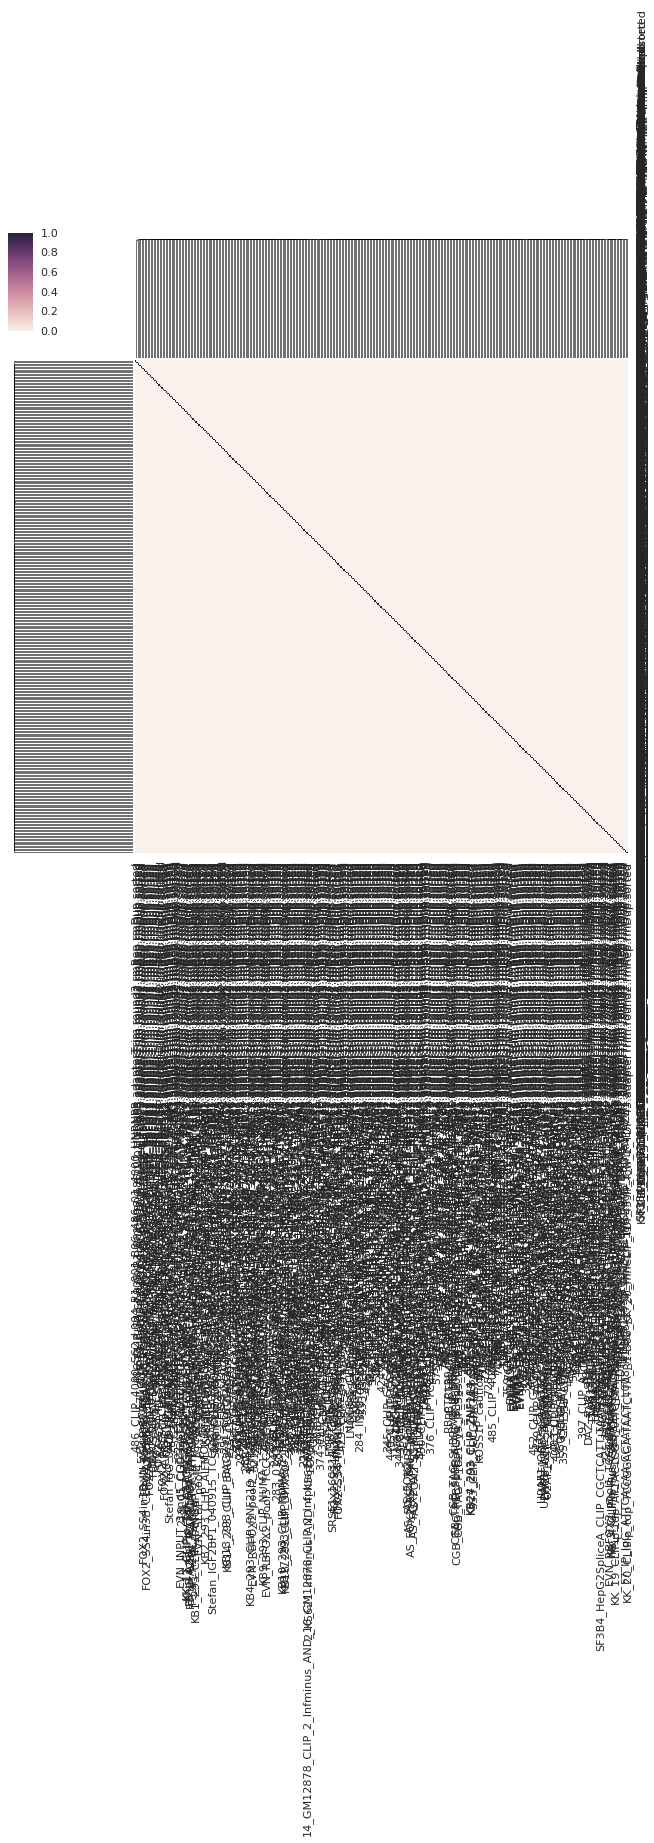

In [55]:
files = pd.read_csv("/home/gpratt/B06_counts.txt", index_col=0)
sns.clustermap(files)

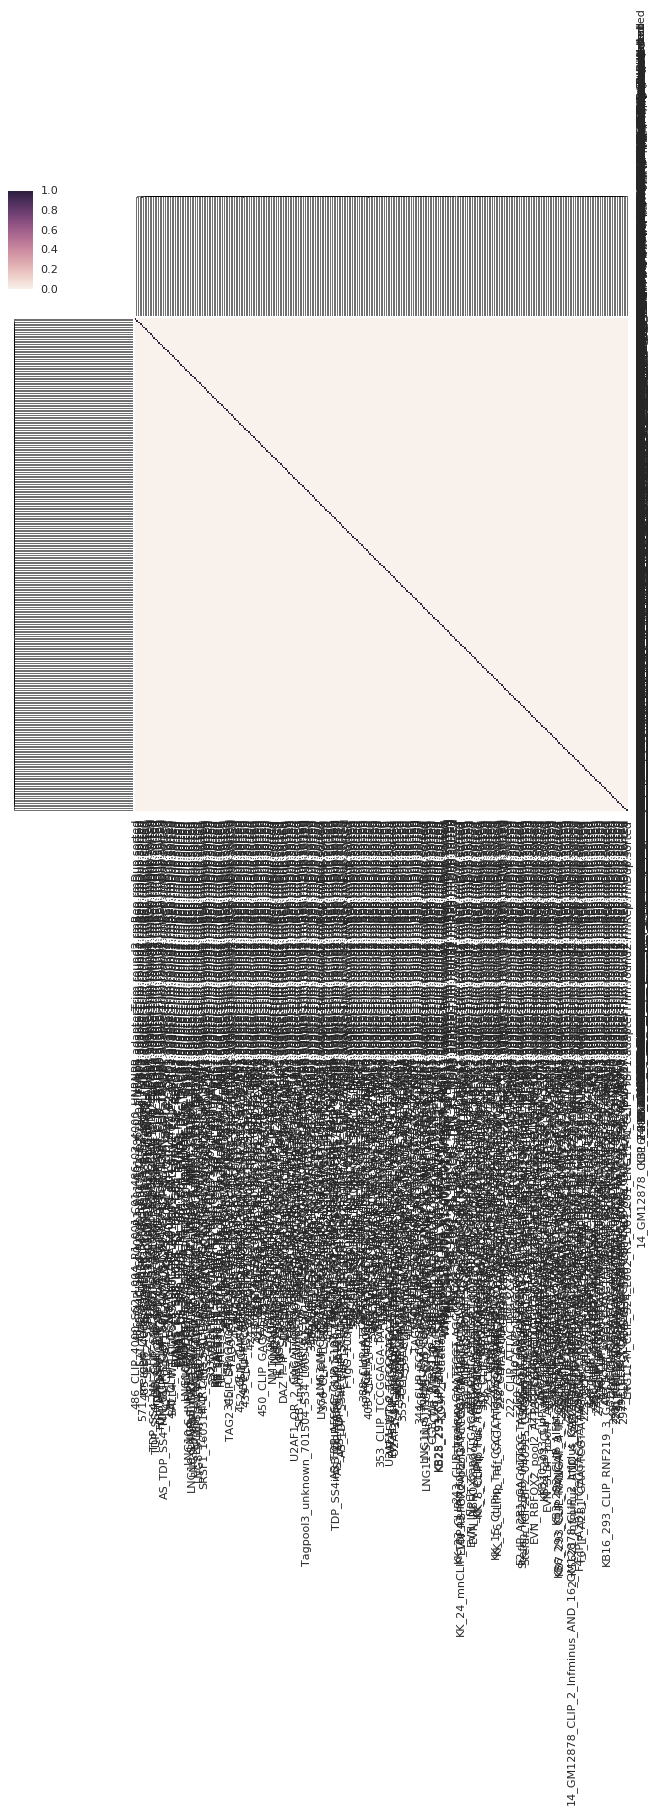

In [56]:
files = pd.read_csv("/home/gpratt/C01_counts.txt", index_col=0)
sns.clustermap(files)

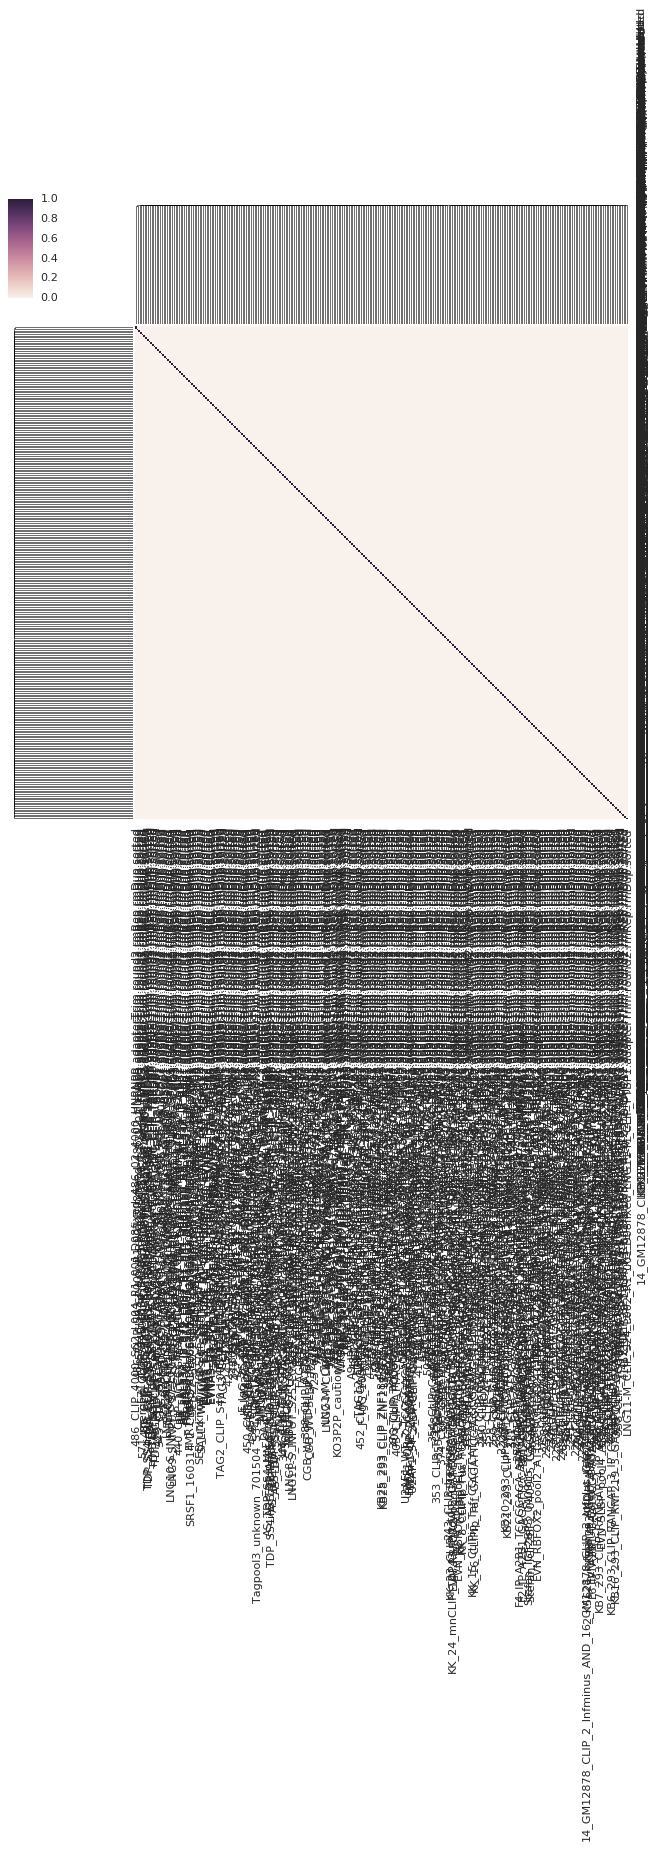

In [57]:
files = pd.read_csv("/home/gpratt/D08fixed_counts.txt", index_col=0)
sns.clustermap(files)

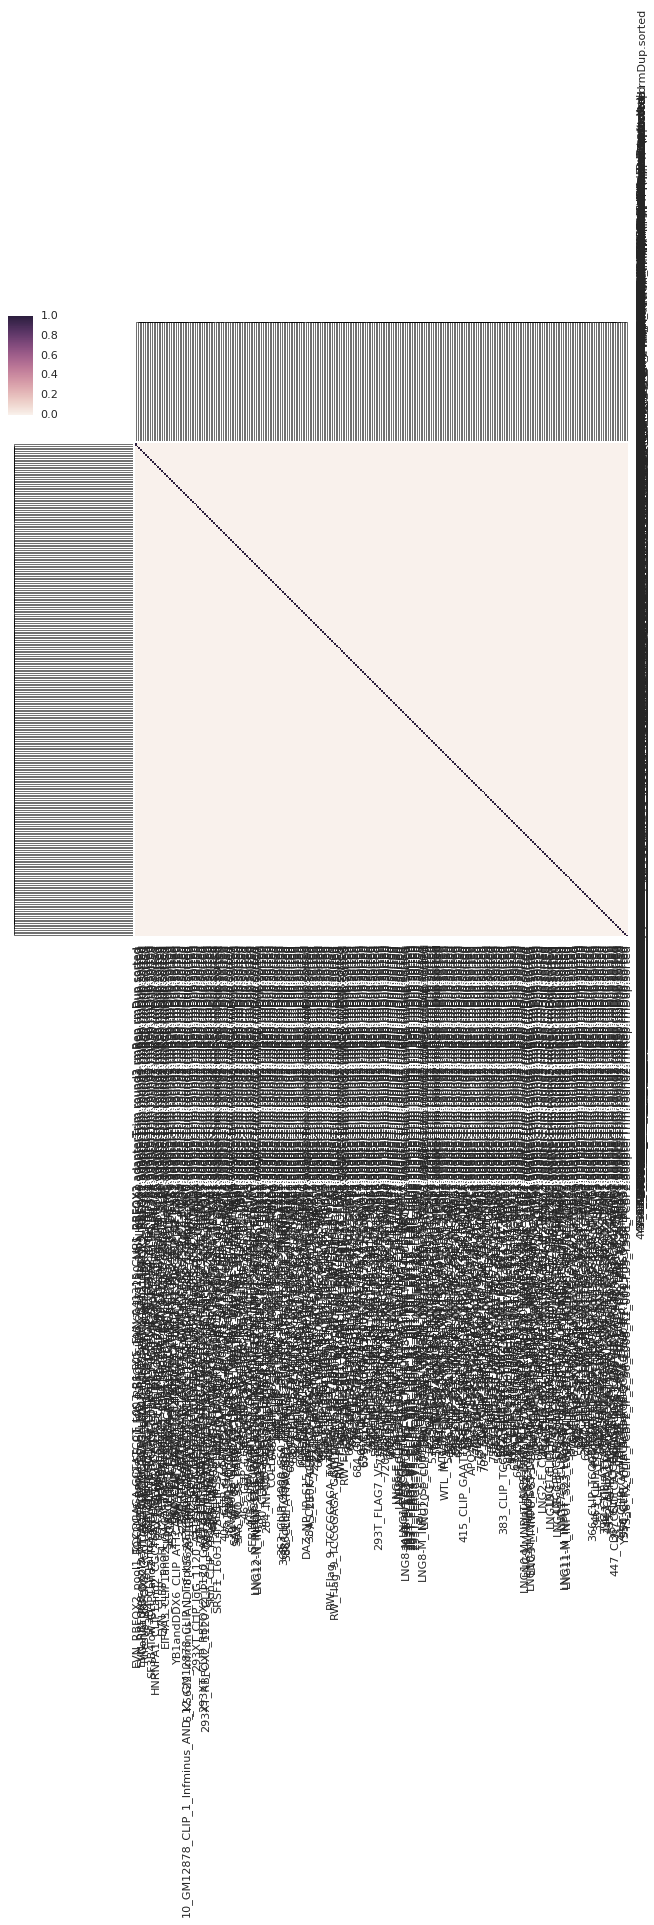

In [58]:
files = pd.read_csv("/home/gpratt/F05_counts.txt", index_col=0)
sns.clustermap(files)

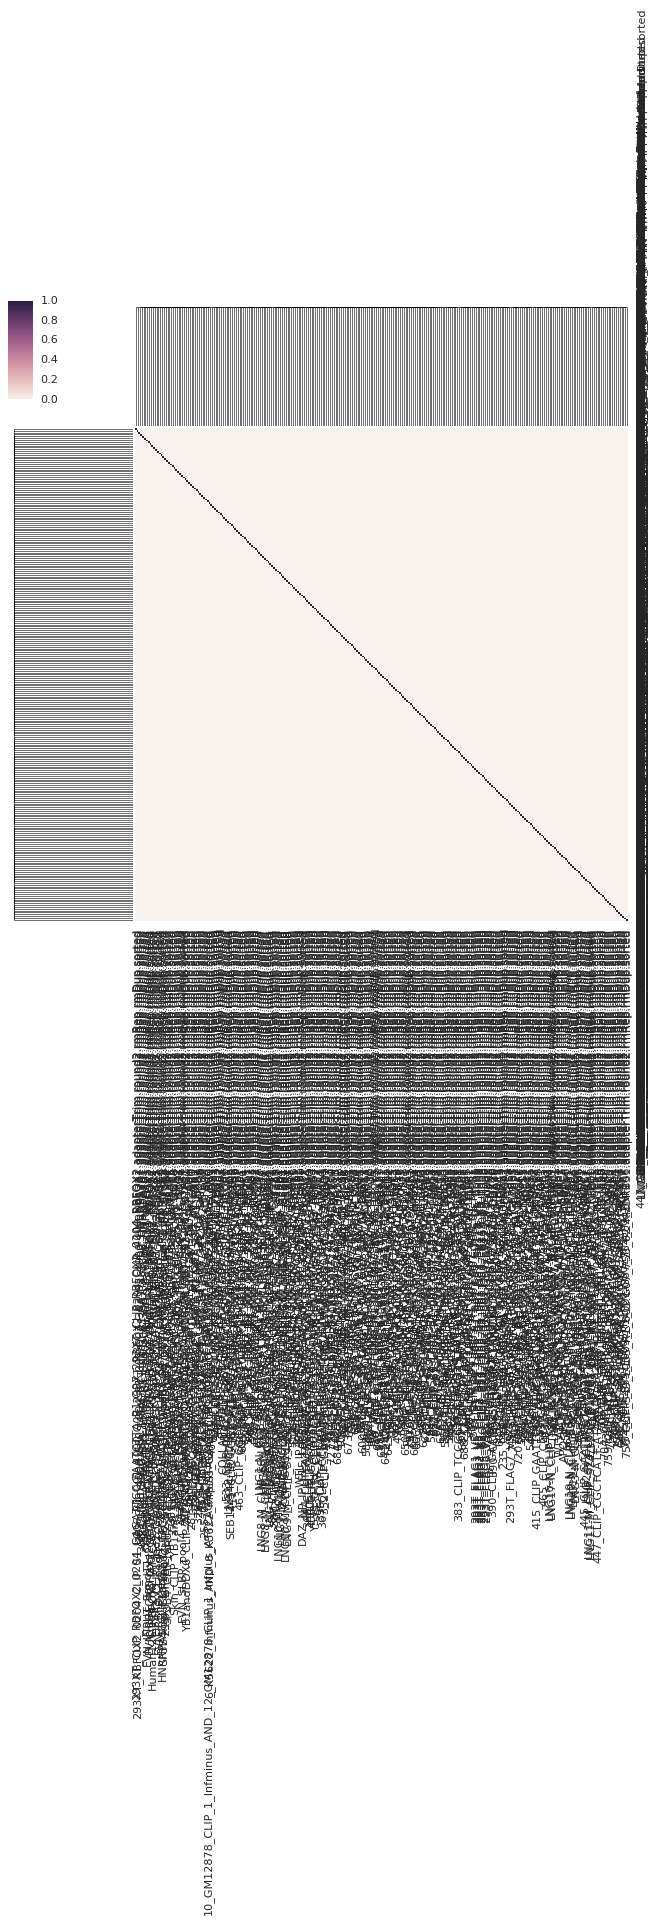

In [59]:
files = pd.read_csv("/home/gpratt/G07_counts.txt", index_col=0)
sns.clustermap(files)

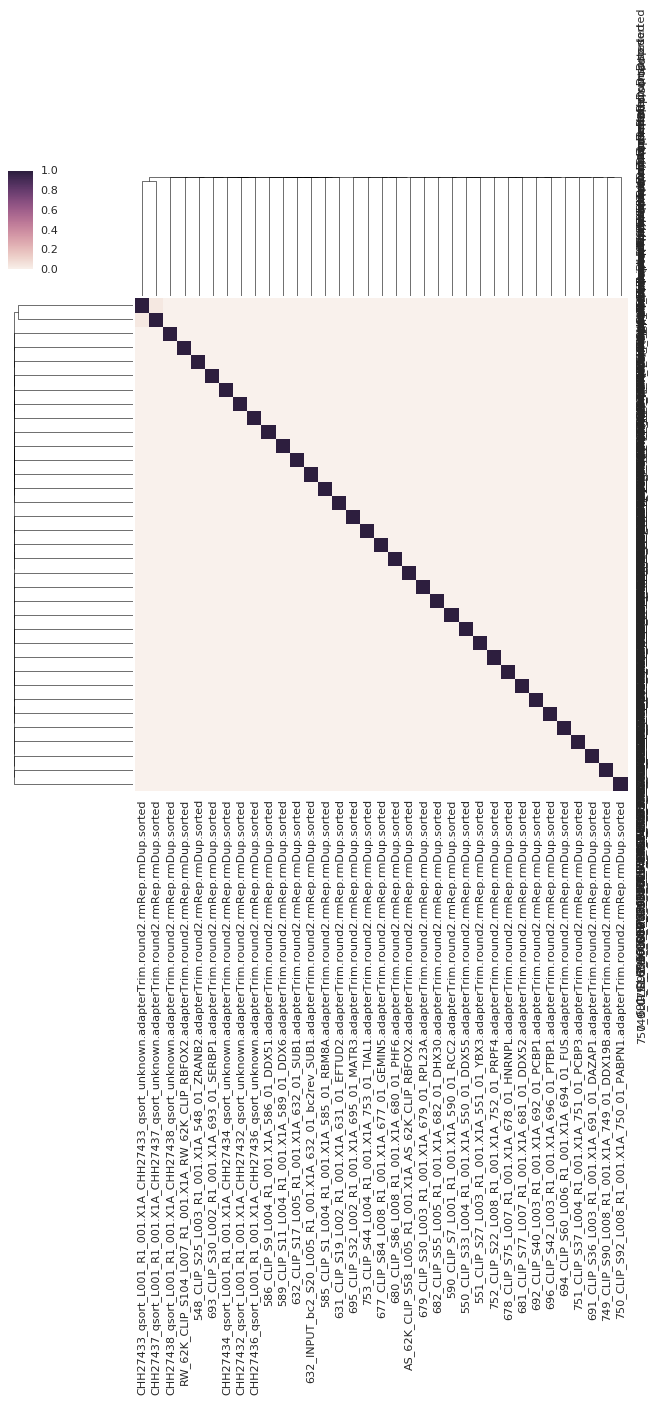

In [60]:
files = pd.read_csv("/home/gpratt/X1A_counts.txt", index_col=0)
sns.clustermap(files)

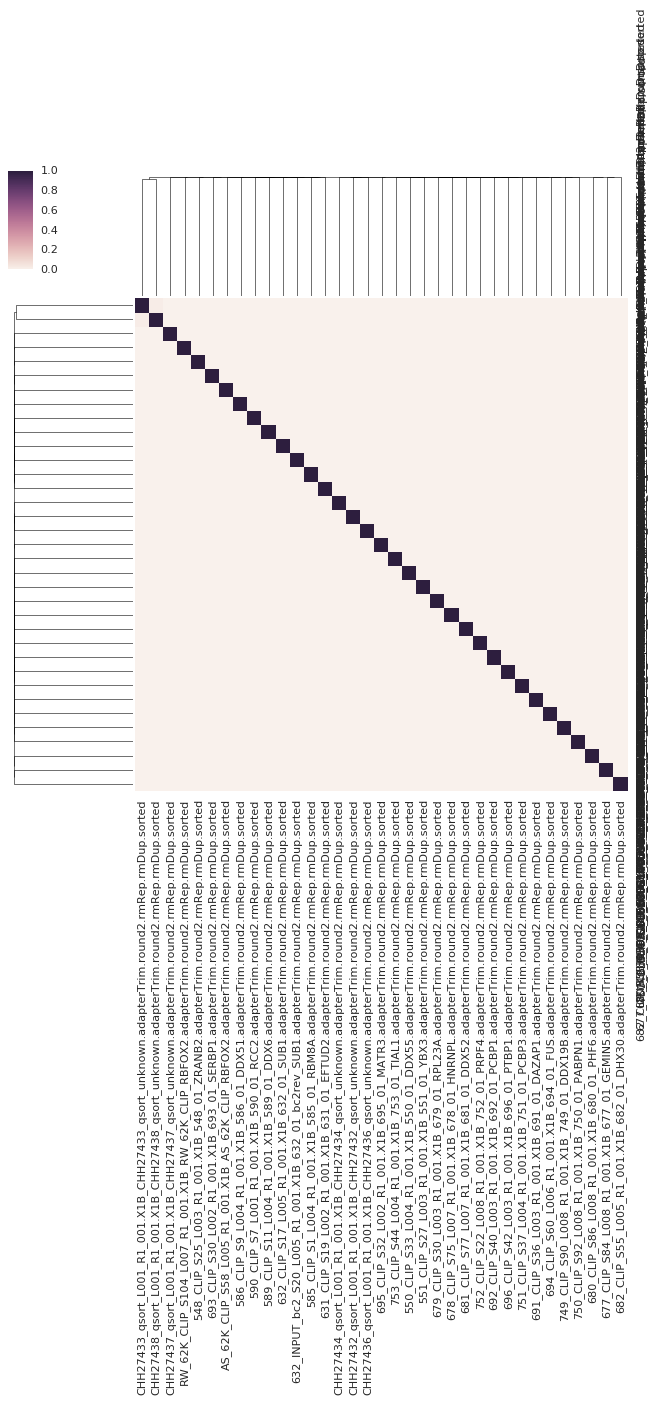

In [61]:
files = pd.read_csv("/home/gpratt/X1B_counts.txt", index_col=0)
sns.clustermap(files)

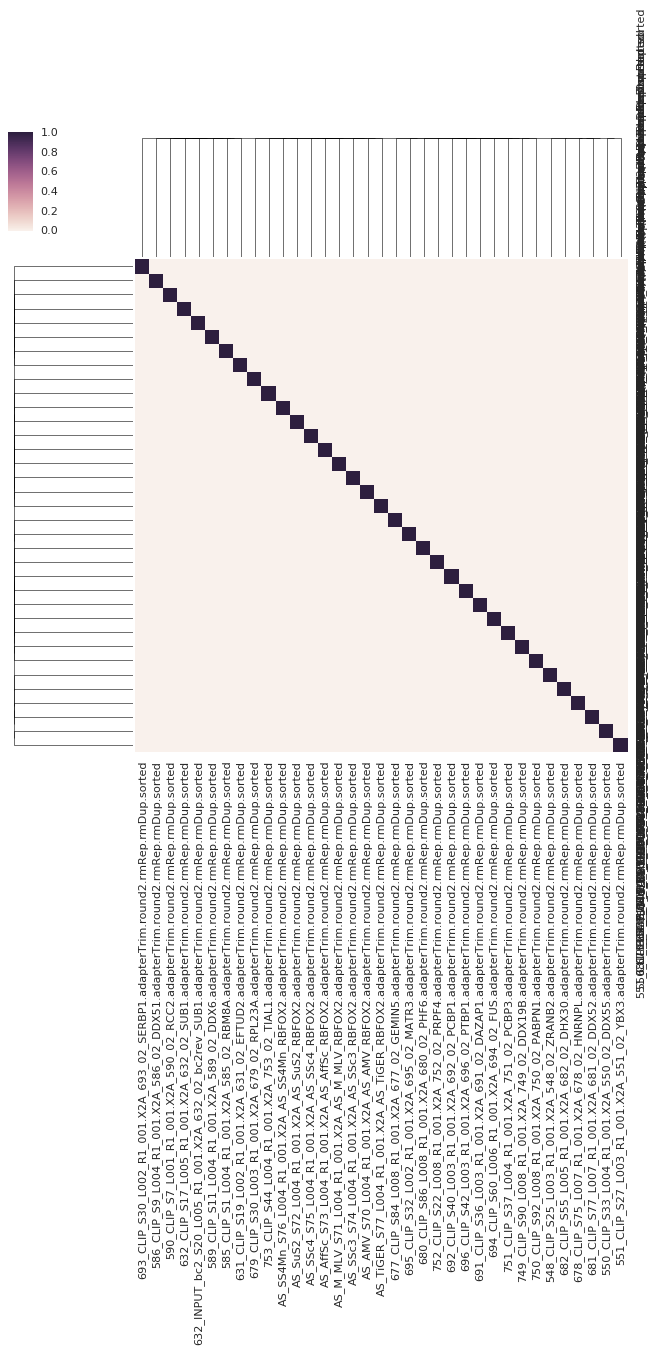

In [62]:
files = pd.read_csv("/home/gpratt/X2A_counts.txt", index_col=0)
sns.clustermap(files)

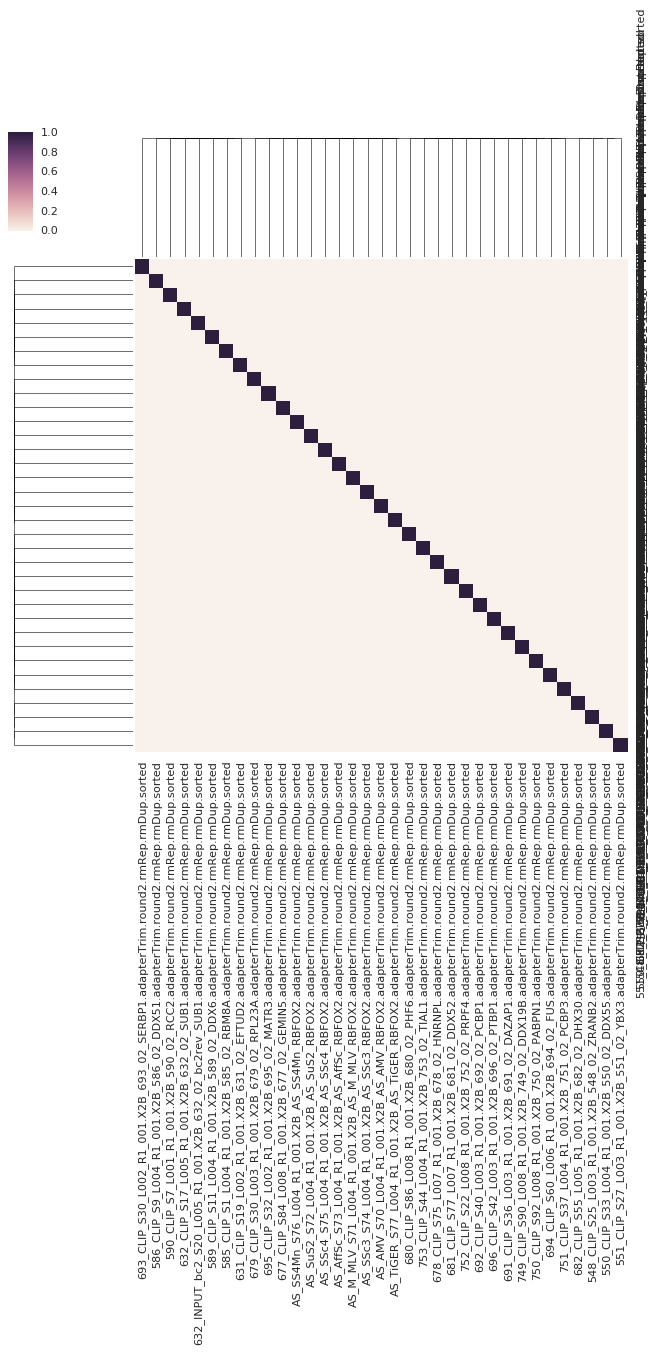

In [63]:
files = pd.read_csv("/home/gpratt/X2B_counts.txt", index_col=0)
sns.clustermap(files)